In [2]:
from astropy.io import fits
import matplotlib.pyplot as plt
from astropy.wcs import WCS
from regions import Regions
import numpy as np
from astropy import units as u
from astropy.nddata import Cutout2D
import pandas as pd
import cv2

# Loading the fits file

In [3]:
#hdul = fits.open('ngc0628_miri_f770w_anchored.fits')
hdul = fits.open('../data files/ngc0628_miri_f770w_anchored.fits')
regions = Regions.read('../data files/jwst-bubbles-v0p1.reg',format='ds9')
hdul.info()

Filename: ../data files/ngc0628_miri_f770w_anchored.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      39   (2968, 2938)   float64   


# Plotting the NGC0628 Galaxy

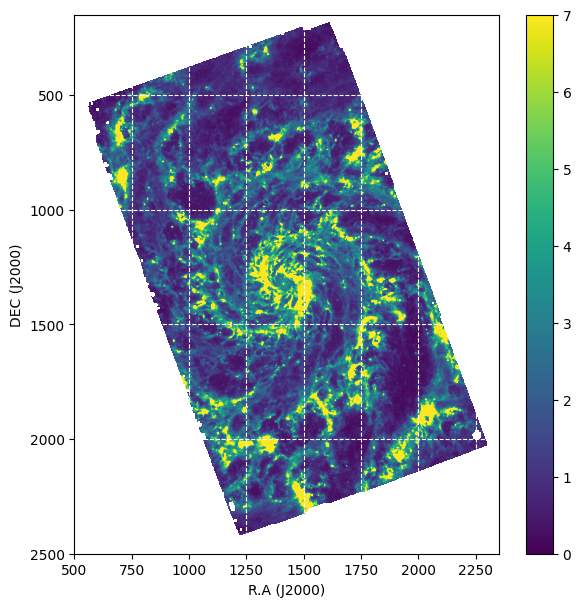

In [3]:
data = hdul[0].data
header = hdul[0].header

#Perform coordinate transforamtion:
wcs = WCS(header)

fig, ax = plt.subplots(figsize=(7,7))
#Show map in World Coordinate System transform from axes
#plt.subplot(projection=wcs)

plt.subplot()

plt.ylim(2500,150)
plt.xlim(500,2350)
plt.imshow(data, vmin=0, vmax=7)

plt.grid(color='white', ls='dashed')
plt.xlabel('R.A (J2000)')
plt.ylabel('DEC (J2000)')
plt.colorbar()

# Plotting bubbles

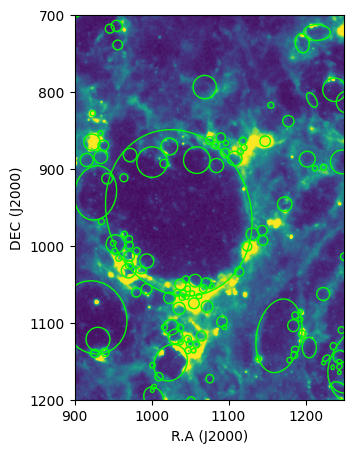

In [10]:
data = hdul[0].data
header = hdul[0].header

#Perform coordinate transforamtion:
wcs = WCS(header)

fig, ax = plt.subplots(figsize=(5,5))
#Show map in World Coordinate System transform from axes
#plt.subplot(projection=wcs)
plt.ylim(1200,700)
plt.xlim(900,1250)
ax.imshow(data, vmin=0, vmax=7)
plt.xlabel('R.A (J2000)')
plt.ylabel('DEC (J2000)')
for i,region in enumerate(regions):
    pixel_region = region.to_pixel(wcs)
    pixel_region.plot(ax=ax)
plt.savefig('../Presentation 6_FEB/bubbles.png')

# Analyzing bubbles

In [7]:
radius_array = np.zeros((len(regions)))

for i,region in enumerate(regions):
    axis_1 = (region.to_pixel(wcs).height/2)
    axis_2 = (region.to_pixel(wcs).width/2)
    radius_array[i] = np.sqrt(axis_1*axis_2)

In [8]:
bubbles_number = len(radius_array)
mean_radius = np.mean(radius_array)
std_radius = np.std(radius_array)
print('Total number of bubbles = ',bubbles_number)
print('MEAN RADIUS = ', round(mean_radius,2),'pix')
print('STANDARD DEVIATION = ',round(std_radius,2),'pix')

Total number of bubbles =  1695
MEAN RADIUS =  6.34 pix
STANDARD DEVIATION =  5.96 pix


Text(0, 0.5, 'Number of bubbles')

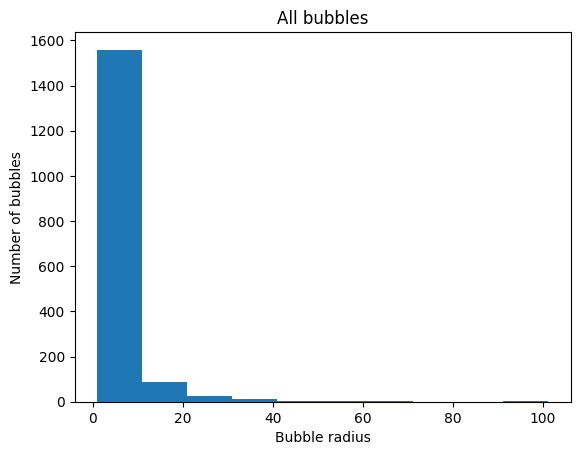

In [9]:
n,bins,patches = plt.hist(radius_array)
plt.title('All bubbles')
plt.xlabel('Bubble radius')
plt.ylabel('Number of bubbles')

In [10]:
radius12_array = list(filter(lambda x: x < 12,radius_array))
print('Number of bubbles with radius less than 12 px = ', len(radius12_array))

Number of bubbles with radius less than 12 px =  1579


In [11]:
perc = (len(radius12_array)/bubbles_number)*100
print('Percentage of bubbles with radius <= to 12 px = ', round(perc,2),"%")

Percentage of bubbles with radius <= to 12 px =  93.16 %


Text(0.5, 0, 'Bubble Radius')

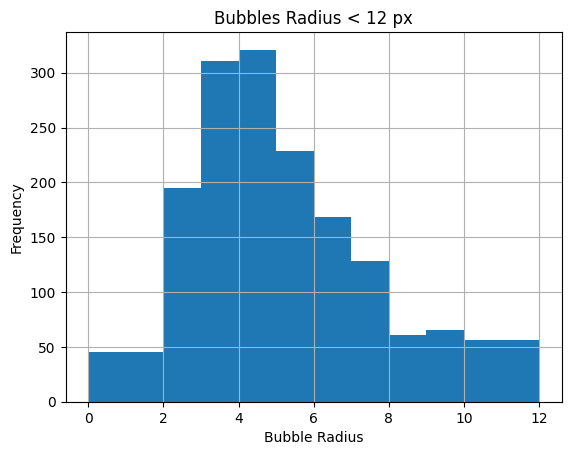

In [12]:
n,bins,patches = plt.hist(radius12_array,bins=[0,2,3,4,5,6,7,8,9,10,12])
plt.grid(True)
plt.title('Bubbles Radius < 12 px')
plt.ylabel('Frequency')
plt.xlabel('Bubble Radius')
# plt.savefig('../Presentation 6_FEB//Histogram.png')

In [13]:
bins_edge = []
for i in bins:
    bins_edge.append(round(i,2))
print(bins_edge)

[0.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 12.0]


# Cutouts ( 24 pix * 24 pix )

#### The cell below shows how cutouts are structured around the bubbles.

<Axes: >

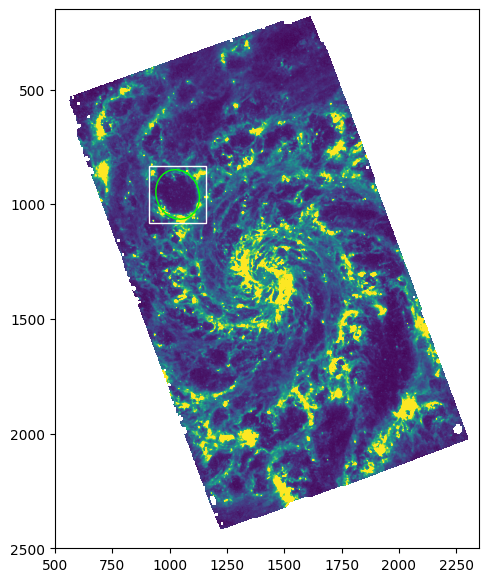

In [14]:
fig, ax = plt.subplots(figsize=(7,7))
#Show map in World Coordinate System transform from axes
#plt.subplot(projection=wcs)

plt.ylim(2500,150)
plt.xlim(500,2350)
ax.imshow(data, vmin=0, vmax=7)

region = regions[132].to_pixel(wcs)
position = (region.center.x,region.center.y)
size = u.Quantity((250,250), u.pixel)
cutout = Cutout2D(data,position,size)

region.plot(ax=ax)
cutout.plot_on_original(color='white')

# plt.savefig('../Presentation 6_FEB/sample_cutout.png')

#### Sample of image with 250 px * 250 px cutout size (had to input vmin and vmax and removed origin='lower' as it was flipping the direction of the image)

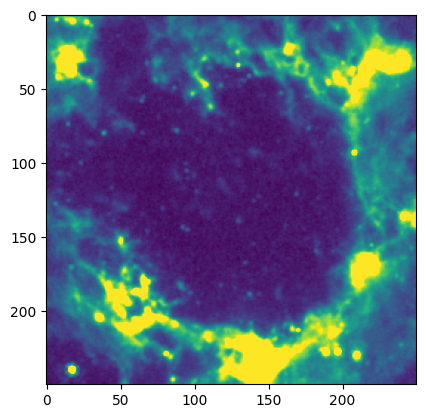

In [15]:
position = (region.center.x,region.center.y)
size = u.Quantity((250,250), u.pixel)
cutout = Cutout2D(data,position,size)

plt.imshow(cutout.data,vmin=0, vmax=7)
plt.show()

#### Neural Network For Handwritten Digits Classification

In [14]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


### Preparing data for training and testing the network
### Saved Images don't have any:
1) White margins
2) Axes
3) Pad inches

In [15]:
# plt.axis('off')
# for i,region in enumerate(regions):
#     region = region.to_pixel(wcs) #Necessary 
    
#     # Calculates radius
#     axis_1 = (region.height/2)
#     axis_2 = (region.width/2)
#     radius = np.sqrt(axis_1*axis_2)
    
#     # Cutout image with radius <= 12 px
#     if radius <= 12:
#         position = (region.center.x,region.center.y)
#         size = u.Quantity((24,24), u.pixel)
#         cutout = Cutout2D(data,position,size)
#         plt.imshow(cutout.data,origin='lower')
#         if bins_edge[0] <= radius <= bins_edge[1]:
#             plt.savefig(f'data/bin0-2/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[1] < radius <= bins_edge[2]:
#             plt.savefig(f'data/bin2-3/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[2] < radius <= bins_edge[3]:
#             plt.savefig(f'data/bin3-4/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[3] < radius <= bins_edge[4]:
#             plt.savefig(f'data/bin4-5/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[4] < radius <= bins_edge[5]:
#             plt.savefig(f'data/bin5-6/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[5] < radius <= bins_edge[6]:
#             plt.savefig(f'data/bin6-7/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[6] < radius <= bins_edge[7]:
#             plt.savefig(f'data/bin7-8/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[7] < radius <= bins_edge[8]:
#             plt.savefig(f'data/bin8-9/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         elif bins_edge[8] < radius <= bins_edge[9]:
#             plt.savefig(f'data/bin9-10/bubble_{i}',bbox_inches='tight',pad_inches = 0)
#         else:
#             plt.savefig(f'data/bin10-12/bubble_{i}',bbox_inches='tight',pad_inches = 0)

# CNN Architecture 1

### Loading Data

In [16]:
data  = tf.keras.utils.image_dataset_from_directory('data')

Found 793 files belonging to 10 classes.
Metal device set to: Apple M1


2023-03-14 15:50:20.396752: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-14 15:50:20.396895: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [17]:
data_iterator = data.as_numpy_iterator()

In [18]:
batch = data_iterator.next()

2023-03-14 15:50:24.239231: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


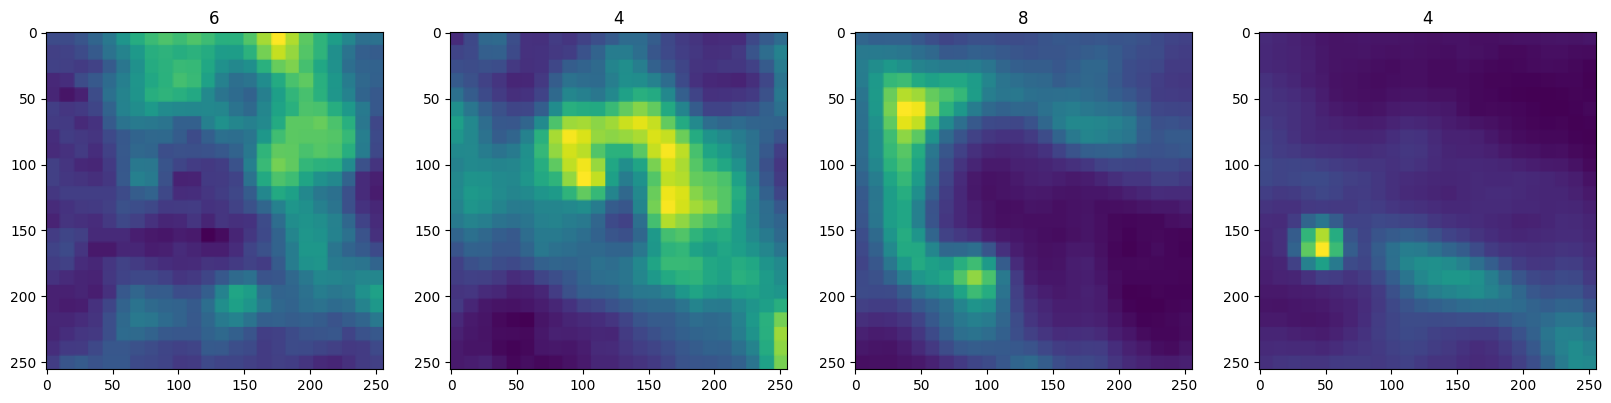

In [19]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

### Scaling Data

In [20]:
data = data.map(lambda x,y: (x/255,y))

In [21]:
print(f"Total number of batches of data available = {len(data)}")

Total number of batches of data available = 25


In [22]:
data.as_numpy_iterator().next()

(array([[[[0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          ...,
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ]],
 
         [[0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          ...,
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ]],
 
         [[0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          [0.1254902 , 0.5647059 , 0.54901963],
          ...,
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ],
          [0.1764706 , 0.43137255, 0.5568628 ]],
 
         ...,
 
         [[0.93333334, 0.8980392 , 0.10588235],
          [0.93333

### Splitting Data

In [23]:
train_size = int(len(data)*0.75)
val_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)

In [24]:
print(train_size,val_size,test_size)

18 5 2


In [25]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

### Core of the Model

In [26]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [28]:
model = Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='sigmoid'))

In [30]:
model.compile('adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

### Training

In [32]:
hist = model.fit(train,epochs=20,validation_data=val)

Epoch 1/20


2023-03-14 15:50:39.838943: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - ETA: 0s - loss: 2.1840 - accuracy: 0.1823

2023-03-14 15:50:44.143884: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


18/18 [==============================] - 5s 127ms/step - loss: 2.1840 - accuracy: 0.1823 - val_loss: 1.9722 - val_accuracy: 0.2000
Epoch 2/20
18/18 [==============================] - 2s 120ms/step - loss: 1.8449 - accuracy: 0.2917 - val_loss: 1.7689 - val_accuracy: 0.3500
Epoch 3/20
18/18 [==============================] - 2s 119ms/step - loss: 1.6034 - accuracy: 0.4132 - val_loss: 1.5112 - val_accuracy: 0.4500
Epoch 4/20
18/18 [==============================] - 2s 120ms/step - loss: 1.3499 - accuracy: 0.5000 - val_loss: 1.4531 - val_accuracy: 0.5625
Epoch 5/20
18/18 [==============================] - 2s 121ms/step - loss: 1.1436 - accuracy: 0.5885 - val_loss: 1.1939 - val_accuracy: 0.5875
Epoch 6/20
18/18 [==============================] - 2s 119ms/step - loss: 0.9485 - accuracy: 0.6684 - val_loss: 1.1252 - val_accuracy: 0.6313
Epoch 7/20
18/18 [==============================] - 2s 122ms/step - loss: 0.8163 - accuracy: 0.7292 - val_loss: 1.0008 - val_accuracy: 0.7125
Epoch 8/20
18/18 

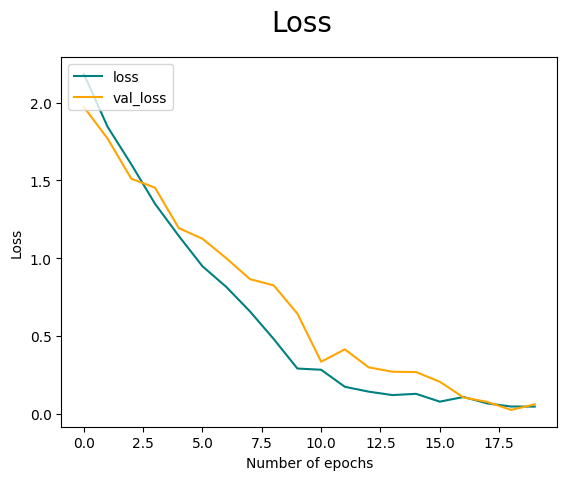

In [33]:
fig = plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
#plt.savefig('../Presentation 6_FEB/loss.png')
plt.show()

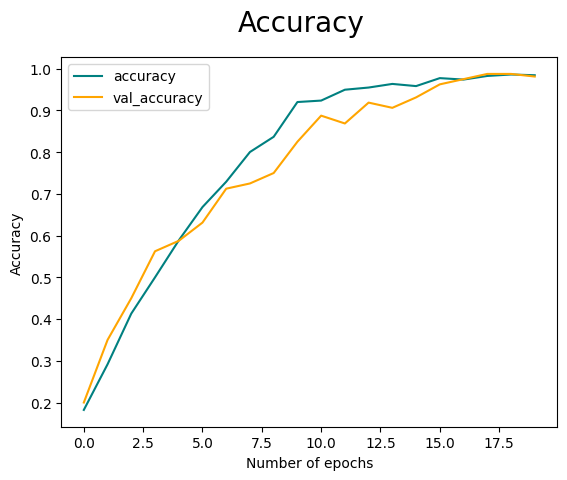

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
#plt.savefig('../Presentation 6_FEB/accuracy.png')
plt.show()